<a href="https://colab.research.google.com/github/hannahgeorge-wickedproblems/data100repository/blob/main/Hawks_Doves_Aisling1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

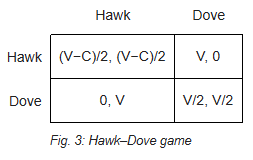

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import random

# The simulation function
def run_simulation(V, C, hawk_ratio):

    class Player:
        def __init__(self, strategy):
            self.strategy = strategy
            self.score = 0

        def encounter(self, opponent):
            if self.strategy == "Hawk":
                if opponent.strategy == "Hawk":
                    win = random.choice([True, False])
                    self.score += V / 2 if win else -C / 2
                else:
                    self.score += V
            else:
                if opponent.strategy == "Hawk":
                    self.score += 0
                else:
                    self.score += V / 2

    # Create players
    num_players = 100
    players = [Player("Hawk" if random.random() < hawk_ratio else "Dove") for _ in range(num_players)]

    # Tracking scores
    hawk_avg_scores = []
    dove_avg_scores = []

    # Running the simulation
    num_interactions = 10000
    for i in range(num_interactions):
        player1, player2 = random.sample(players, 2)
        player1.encounter(player2)
        player2.encounter(player1)

        if i % 10 == 0:
            hawks = [p for p in players if p.strategy == "Hawk"]
            doves = [p for p in players if p.strategy == "Dove"]
            average_hawk_score = sum(p.score for p in hawks) / len(hawks) if hawks else 0
            average_dove_score = sum(p.score for p in doves) / len(doves) if doves else 0
            hawk_avg_scores.append(average_hawk_score)
            dove_avg_scores.append(average_dove_score)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(hawk_avg_scores, label='Average Hawk Score')
    plt.plot(dove_avg_scores, label='Average Dove Score')
    plt.xlabel('Interactions (in tens)')
    plt.ylabel('Average Score')
    plt.title('Average Scores of Hawks vs. Doves Over Time')
    plt.legend()
    plt.show()

# Interactive widgets
V_slider = widgets.IntSlider(value=50, min=0, max=100, step=5, description='Value (V):')
C_slider = widgets.IntSlider(value=100, min=0, max=200, step=5, description='Cost (C):')
hawk_ratio_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='Hawk to Dove Ratio:')

widgets.interactive(run_simulation, V=V_slider, C=C_slider, hawk_ratio=hawk_ratio_slider)


interactive(children=(IntSlider(value=50, description='Value (V):', step=5), IntSlider(value=100, description=…